# **Amazon Dataset**

## About the Data

* This dataset is having the data of 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon.
* The dataset contains 1,465 entries with 16 columns, covering details about various products, including product information, pricing, ratings, reviews, and links to images and product pages. Several columns contain numerical data stored as text (e.g., prices and ratings), which will require conversion for analysis.

# Step 1: Data Loading

### 1.Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
from sqlalchemy import create_engine
import mysql.connector

### 2.Load data

In [4]:
amazon = pd.read_csv('amazon.csv')

In [5]:
amazon.head(5)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1,category2,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers & Accessories,Accessories & Peripherals,Above Average,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers & Accessories,Accessories & Peripherals,Above Average,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers & Accessories,Accessories & Peripherals,Average,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers & Accessories,Accessories & Peripherals,Above Average,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers & Accessories,Accessories & Peripherals,Above Average,245.0


In [6]:
amazon.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'user_id', 'user_name', 'review_id', 'review_title', 'review_content',
       'img_link', 'product_link', 'category1', 'category2', 'rating_score',
       'difference_price'],
      dtype='object')

In [7]:
amazon.shape

(1465, 19)

In [8]:
print(f"rows: {amazon.shape[0]}, columns: {amazon.shape[1]}")

rows: 1465, columns: 19


In [9]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   float64
 5   rating               1465 non-null   float64
 6   rating_count         1465 non-null   float64
 7   about_product        1465 non-null   object 
 8   user_id              1465 non-null   object 
 9   user_name            1465 non-null   object 
 10  review_id            1465 non-null   object 
 11  review_title         1465 non-null   object 
 12  review_content       1465 non-null   object 
 13  img_link             1465 non-null   object 
 14  product_link         1465 non-null   object 
 15  category1            1465 non-null   o

# Step 2: Data cleaning and Transformation

### 1. Clean and Convert Data:
* Remove symbols from prices, convert them to numeric.*
* Clean up ratings, discount percentages, and other fields.*

In [10]:
amazon.dtypes

product_id              object
product_name            object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
category1               object
category2               object
rating_score            object
difference_price       float64
dtype: object

In [15]:
amazon["user_id"] = amazon["user_id"].astype("string")		
amazon["user_name"] = amazon["user_name"].astype("string")		
amazon["review_title"] = amazon["review_title"].astype("string")		
amazon["review_content"] = amazon["review_content"].astype("string")		
amazon["img_link"] = amazon["img_link"].astype("string")		
amazon["product_link"] = amazon["product_link"].astype("string")	

In [16]:
amazon['discounted_price'] = pd.to_numeric(amazon['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
amazon['actual_price'] = pd.to_numeric(amazon['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')
amazon['rating_count'] = pd.to_numeric(amazon['rating_count'].str.replace(',', ''), errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [17]:
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%','').astype('float64')

AttributeError: Can only use .str accessor with string values!

In [18]:
amazon['discount_percentage'] = amazon['discount_percentage'] / 100

In [19]:
amazon['discount_percentage'].head(5)

0    0.0064
1    0.0043
2    0.0090
3    0.0053
4    0.0061
Name: discount_percentage, dtype: float64

### 2. Handle Missing Values:

In [20]:
amazon.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
category1              0
category2              0
rating_score           0
difference_price       0
dtype: int64

###### Different ways to output the rows with null values:

In [21]:
amazon[amazon["rating_count"].isnull()]   #1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1,category2,rating_score,difference_price


In [22]:
amazon.loc[amazon['rating_count'].isna()]  #2

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1,category2,rating_score,difference_price


In [23]:
amazon[amazon.isnull().any(axis=1)]     #3

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1,category2,rating_score,difference_price


In [24]:
amazon['rating_count'] = amazon['rating_count'].fillna(amazon['rating_count'].mode()[0])

In [25]:
amazon[amazon["rating_count"].isnull() == True]

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1,category2,rating_score,difference_price


In [26]:
amazon['rating'].value_counts()

rating
4.1    245
4.3    230
4.2    228
4.0    181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      4
4.8      3
5.0      3
3.2      2
2.8      2
2.3      1
2.0      1
2.6      1
2.9      1
Name: count, dtype: int64

In [27]:
amazon[amazon["rating"].isnull()] 

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1,category2,rating_score,difference_price


In [28]:
amazon['rating'] = amazon['rating'].fillna(amazon['rating'].mode()[0])

In [29]:
amazon.isnull().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
category1              0
category2              0
rating_score           0
difference_price       0
dtype: int64

### 3. Duplicates:

In [30]:
amazon.duplicated().sum()

np.int64(0)

### 4. Descriptive statistics 

In [31]:
amazon.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,difference_price
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.004769,4.096587,18283.367235,2319.679761
std,6944.304394,10874.826864,0.002164,0.291574,42725.921124,4604.473790
min,39.000000,39.000000,0.000000,2.000000,2.000000,0.000000
25%,325.000000,800.000000,0.003200,4.000000,1191.000000,371.000000
50%,799.000000,1650.000000,0.005000,4.100000,5179.000000,800.000000
75%,1999.000000,4295.000000,0.006300,4.300000,17325.000000,1953.000000
max,77990.000000,139900.000000,0.009400,5.000000,426973.000000,61910.000000


### 5. Splitting Categories

In [32]:
sorted(amazon['category'].unique())

KeyError: 'category'

In [ ]:
splitted = amazon['category'].str.split('|', expand=True)

In [ ]:
splitted = splitted.rename(columns={0:'category1', 1:'category2', 2:'category3', 3:'category4', 4:'category5', 5:'category6', 6:'category7'})

In [33]:
splitted

NameError: name 'splitted' is not defined

In [34]:
splitted.drop(columns=['category3','category4','category5','category6','category7'], inplace=True)

NameError: name 'splitted' is not defined

In [146]:
splitted

,category1,category2
0,Computers&Accessories,Accessories&Peripherals
1,Computers&Accessories,Accessories&Peripherals
2,Computers&Accessories,Accessories&Peripherals
3,Computers&Accessories,Accessories&Peripherals
4,Computers&Accessories,Accessories&Peripherals
...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances
1461,Home&Kitchen,Kitchen&HomeAppliances
1462,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,Home&Kitchen,"Heating,Cooling&AirQuality"


In [147]:
amazon_clean = pd.concat([amazon, splitted], axis=1)

In [148]:
amazon_clean.drop(columns='category', inplace=True)

In [149]:
amazon_clean

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category1,category2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https

In [150]:
amazon_clean['category1'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [151]:
unique1 = pd.DataFrame(amazon_clean['category1'].unique(),columns = ['category1'])

In [152]:
unique1

,category1
0,Computers&Accessories
1,Electronics
2,MusicalInstruments
3,OfficeProducts
4,Home&Kitchen
5,HomeImprovement
6,Toys&Games
7,Car&Motorbike
8,Health&PersonalCare


In [153]:
unique2 = pd.DataFrame(amazon_clean['category2'].unique(),columns = ['category2'])

In [154]:
unique2

,category2
0,Accessories&Peripherals
1,NetworkingDevices
2,"HomeTheater,TV&Video"
3,HomeAudio
4,WearableTechnology
5,Mobiles&Accessories
6,Accessories
7,"Headphones,Earbuds&Accessories"
8,ExternalDevices&DataStorage
9,Microphones


In [155]:
amazon_clean['category1'].value_counts()

category1
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [156]:
amazon_clean['category1'] = amazon_clean['category1'].str.replace('&', ' & ')

In [157]:
amazon_clean['category1'] = amazon_clean['category1'].str.replace('OfficeProducts', 'Office Products')
amazon_clean['category1'] = amazon_clean['category1'].str.replace('MusicalInstruments', 'Musical Instruments')
amazon_clean['category1'] = amazon_clean['category1'].str.replace('HomeImprovement', 'Home Improvement')

In [158]:
amazon_clean['category2'].value_counts()

category2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Microphones                                  2
Monitors                                     2
Ele

In [159]:
amazon_clean['category2'] = amazon_clean['category2'].str.replace('&', ' & ')

In [160]:
amazon_clean['category2'] = amazon_clean['category2'].str.replace(',', ', ')

In [161]:
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeAppliances', 'Home Appliances')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('AirQuality', 'Air Quality')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('WearableTechnology', 'Wearable Technology')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('NetworkingDevices', 'Networking Devices')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('OfficePaperProducts', 'Office Paper Products')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('ExternalDevices', 'External Devices')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('DataStorage', 'Data Storage')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeStorage', 'Home Storage')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeAudio', 'Home Audio')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('BatteryChargers', 'Battery Chargers')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('CraftMaterials', 'Craft Materials')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('OfficeElectronics', 'Office Electronics')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('PowerAccessories', 'Power Accessories')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('CarAccessories', 'Car Accessories')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')			
amazon_clean['category2'] = amazon_clean['category2'].str.replace('HomeTheater', 'Home Theater')			

In [162]:
amazon_clean['category2'].value_counts()

category2
Accessories & Peripherals                       381
Kitchen & Home Appliances                       308
Home Theater, TV & Video                        162
Mobiles & Accessories                           161
Heating, Cooling & Air Quality                  116
Wearable Technology                              76
Headphones, Earbuds & Accessories                66
Networking Devices                               34
Office Paper Products                            27
External Devices & Data Storage                  18
Cameras & Photography                            16
Home Storage & Organization                      16
Home Audio                                       16
General Purpose Batteries & Battery Chargers     14
Accessories                                      14
Printers, Inks & Accessories                     11
Craft Materials                                   7
Components                                        5
Office Electronics                                4
Mi

# Step 3: Exploratory Data Analysis (EDA)

In [163]:
# Summary statistics
amazon_clean[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096587,18283.367235
std,6944.304394,10874.826864,0.216359,0.291574,42725.921124
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


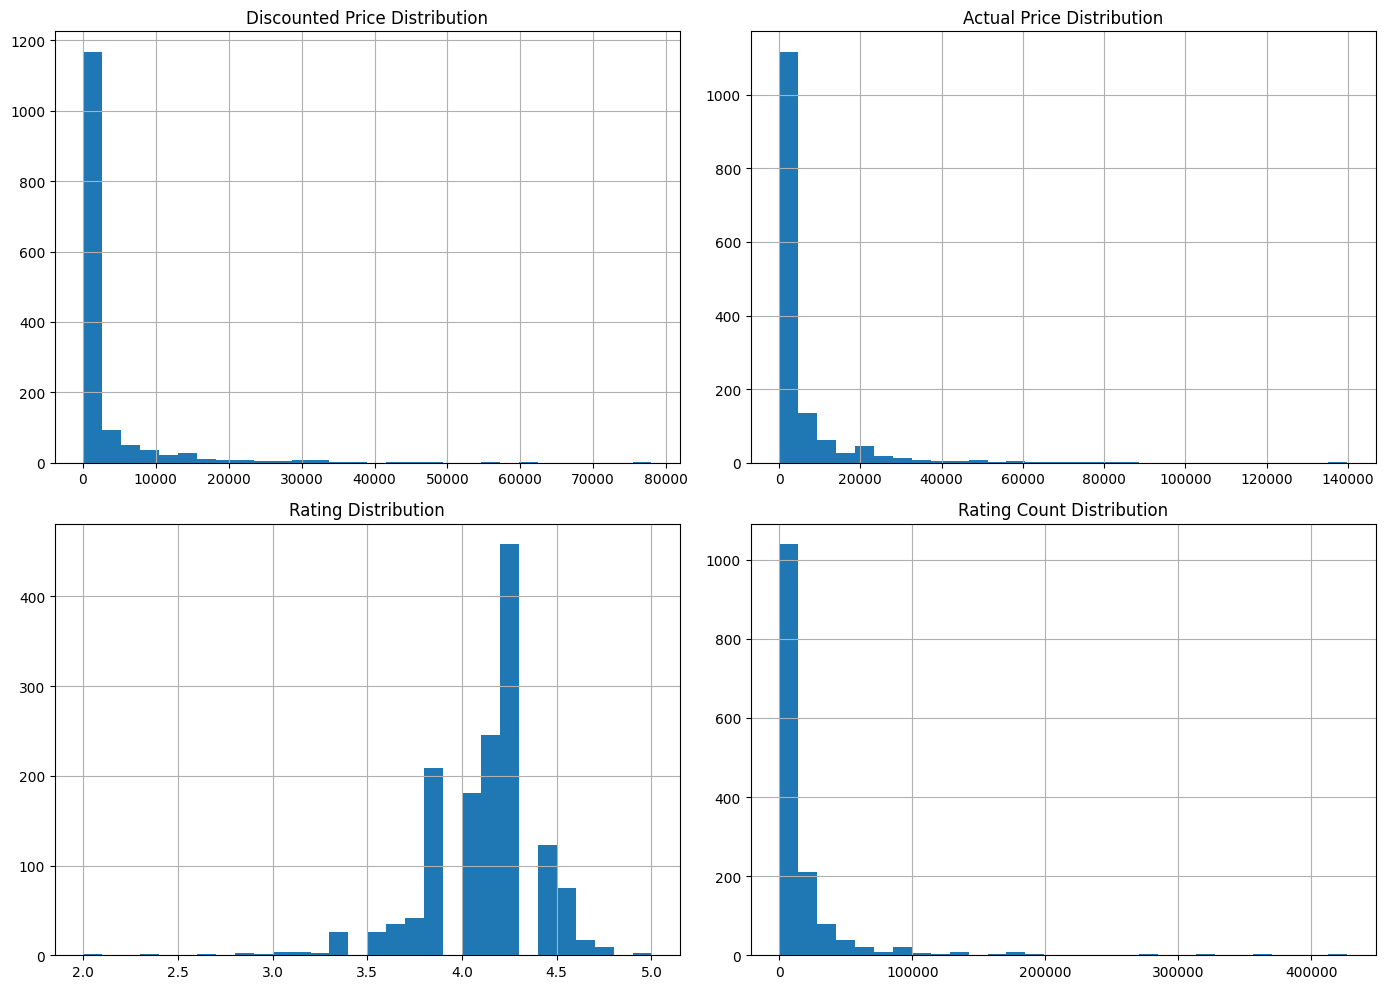

In [164]:
# Histograms for key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
amazon_clean['discounted_price'].hist(ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Discounted Price Distribution')
amazon_clean['actual_price'].hist(ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Actual Price Distribution')
amazon_clean['rating'].hist(ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Rating Distribution')
amazon_clean['rating_count'].hist(ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Rating Count Distribution')
plt.tight_layout()
plt.show()

In [165]:
# 1. The most of customer ratings fall within the 3-4 and 4-5 range. The distribution of customer ratings suggests that most customers are satisfied with the products

In [166]:
#2. The distribution of discounted price and actual price show us that the price mostly range between 0-2500Rupies and 0-5000Rupies respectively.
# There is a significant decrease in price after discount.

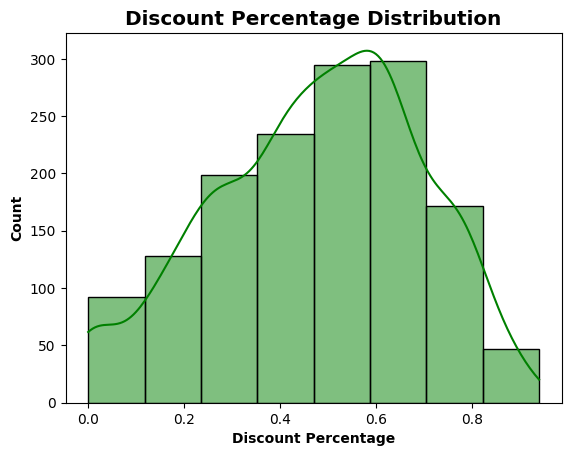

In [167]:
disc_hist = sns.histplot(data=amazon_clean, x='discount_percentage', bins=8, kde=True, color='green')
disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')
plt.show()

In [168]:
# Most discount percentage ranges between 50%  and 70%. 

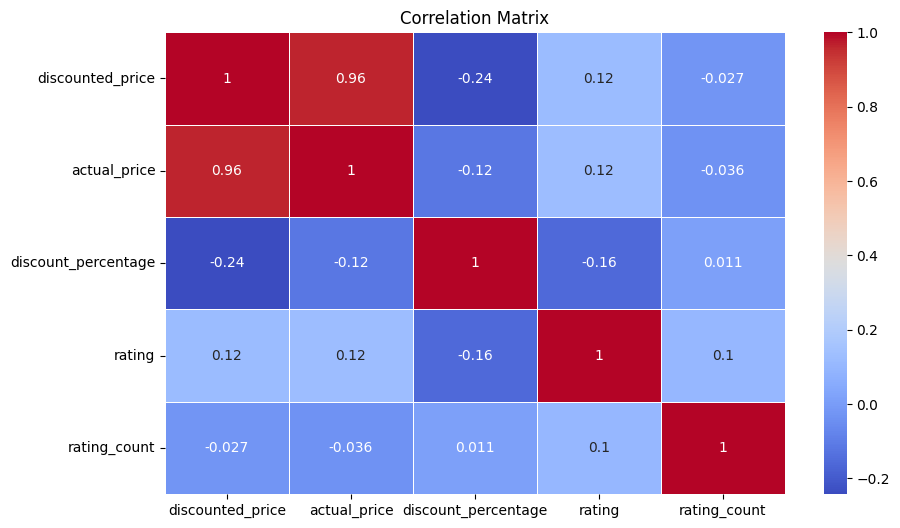

In [169]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = amazon_clean[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [170]:
# We see high positive correlation between actual and discounted prices, that is reasonable. 
# Rating and Discounted price have weak positive correlation (0.12), it means that rating doesn't actually impact on discount percentage or that customers not always rate the product because of discounted price.  
# Also we can see weak correlation between rating and rating_count (0.1), which means the more the rating the more (slightly) tend to review and rate the product. 


### Product Performance Analysis

In [171]:
# Top-rated products
top_rated_products = amazon_clean.sort_values(by='rating', ascending=False).head(10)
top_rated_products[['product_name', 'rating', 'rating_count']]

,product_name,rating,rating_count
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0,23.0
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",5.0,9378.0
174,Syncwire LTG to USB Cable for Fast Charging Co...,5.0,5.0
1145,Swiffer Instant Electric Water Heater Faucet T...,4.8,53803.0
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",4.8,3964.0
1201,"Oratech Coffee Frother electric, milk frother ...",4.8,28.0
1223,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",4.7,1729.0
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,4.7,5935.0
459,Spigen EZ Fit Tempered Glass Screen Protector ...,4.7,7779.0
1275,Multifunctional 2 in 1 Electric Egg Boiling St...,4.7,2300.0


In [172]:
#Creating rating score for Rankings
rating_score = []			
for score in amazon_clean['rating']:			
    if score < 2.0 : rating_score.append('Poor')			
    elif score < 3.0 : rating_score.append('Below Average')			
    elif score < 4.0 : rating_score.append('Average')			
    elif score < 5.0 : rating_score.append('Above Average')			
    elif score == 5.0 : rating_score.append('Excellent')	

In [173]:
amazon_clean['rating_score'] = rating_score
amazon_clean['rating_score'] = amazon_clean['rating_score'].astype('category')
rating_score = amazon_clean["rating_score"].value_counts().reindex(index = ['Below Average', 'Average', 'Above Average', 'Excellent']). \
rename_axis('rating_score').reset_index(name='counts')
rating_score

,rating_score,counts
0,Below Average,6
1,Average,348
2,Above Average,1108
3,Excellent,3


In [174]:
# So we that most products have been rated Above Average in the range of 4-5. Few products that are rated Below Average and Excellent. No products are rated as Poor.*

In [175]:
# Top rated and poor rated products
five_star = amazon_clean.query("rating == 5")

In [176]:
five_star.shape

(3, 18)

<BarContainer object of 3 artists>

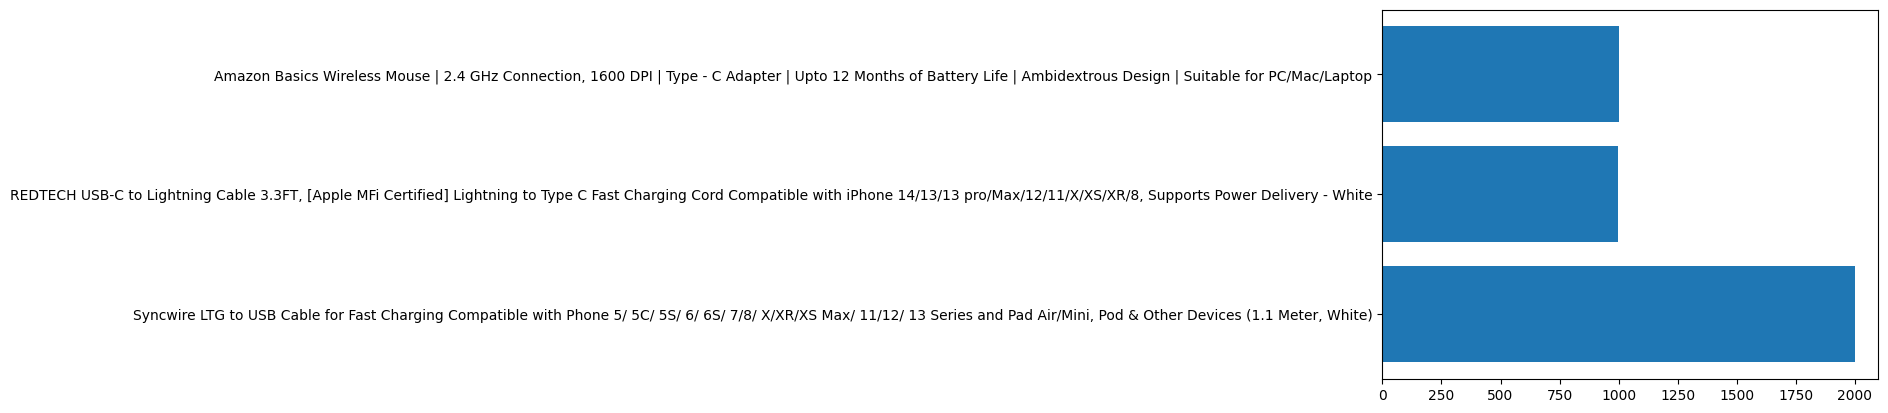

In [177]:
plt.barh(five_star['product_name'],five_star['actual_price'])

In [178]:
poor_rating = amazon_clean.query("rating < 3").sort_values(by="actual_price")

<BarContainer object of 6 artists>

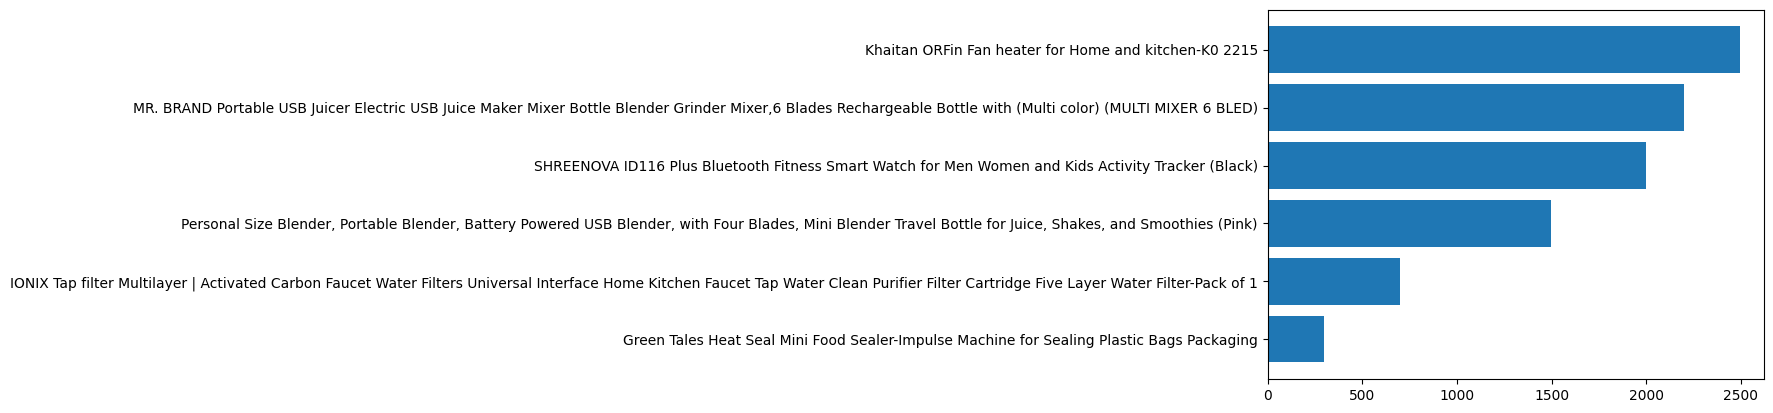

In [179]:
plt.barh(poor_rating['product_name'],poor_rating['actual_price'])

In [180]:
# Analysing products by Categories*

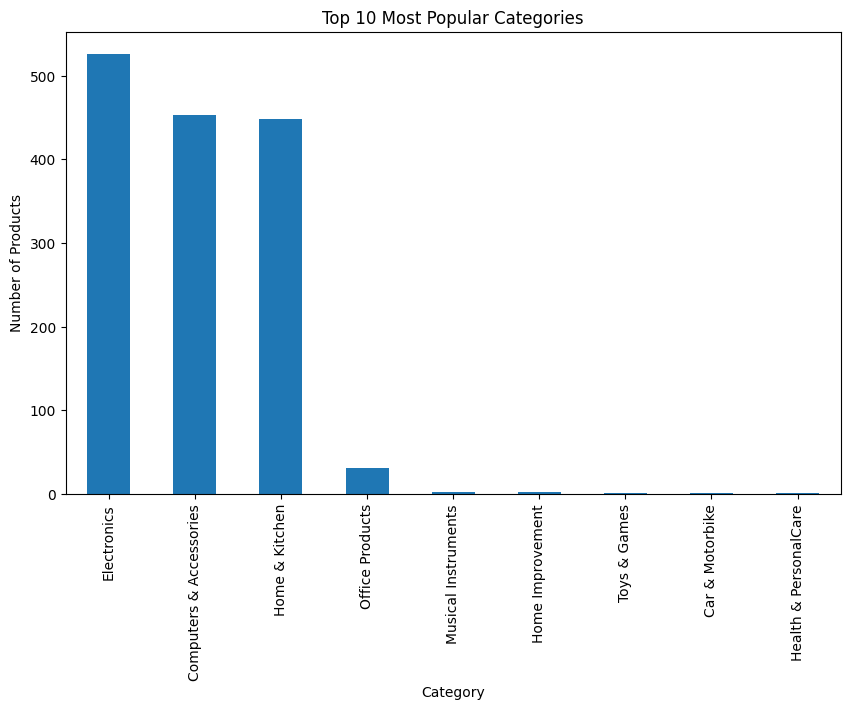

In [181]:
# Most popular categories based on product count
popular_categories = amazon_clean['category1'].value_counts().head(10)
plt.figure(figsize=(10, 6))
popular_categories.plot(kind='bar')
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [182]:
 # Top three main categories are Electronics, Computers & Accessories, and Home & Kitchen. This shows that these categories are popular among customers.

In [183]:
# Office Products, Musical Instruments, Home Improvement, Toys & Games, Car & Motorbike, and Health & Personal Care have a very small number of products, which may suggest that these categories have less demand.

In [184]:
# Number of products in each categories, subcategories
category_product = amazon_clean[['category1', 'category2', 'product_id']]
category_product = pd.pivot_table(category_product, index=['category1', 'category2'], aggfunc='count')
category_product

product_id
category1               category2                                               
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

In [185]:
# Average rating by categories
average_rating = amazon_clean.groupby("category1")["rating"].mean().reset_index()

In [186]:
average_rating

,category1,rating
0,Car & Motorbike,3.800000
1,Computers & Accessories,4.154967
2,Electronics,4.081749
3,Health & PersonalCare,4.000000
4,Home & Kitchen,4.040848
5,Home Improvement,4.250000
6,Musical Instruments,3.900000
7,Office Products,4.309677
8,Toys & Games,4.300000


In [187]:
top_products = amazon_clean.sort_values(['category1', 'rating_count','rating'], ascending=[True, False,True])

In [188]:
top_products = top_products[['category1', 'rating', 'rating_count']].groupby("category1").agg({"rating": "mean","rating_count": "sum"})

In [189]:
#top_products['rating_count'] = top_products['rating_count'].sort_values(ascending=False)

In [190]:
top_products.reset_index().sort_values(['rating_count'])

,category1,rating,rating_count
0,Car & Motorbike,3.800000,1118.0
3,Health & PersonalCare,4.000000,3663.0
5,Home Improvement,4.250000,8566.0
8,Toys & Games,4.300000,15867.0
6,Musical Instruments,3.900000,88882.0
7,Office Products,4.309677,149675.0
4,Home & Kitchen,4.040848,2991069.0
1,Computers & Accessories,4.154967,7747445.0
2,Electronics,4.081749,15778848.0


In [191]:
# Distribution of products by Category
by_category1 = amazon_clean['category1'].value_counts()[:30]

In [192]:
top_categories1 = pd.DataFrame({'Category1': by_category1.index, 'Number of Products': by_category1.values})			

In [193]:
top_categories1

,Category1,Number of Products
0,Electronics,526
1,Computers & Accessories,453
2,Home & Kitchen,448
3,Office Products,31
4,Musical Instruments,2
5,Home Improvement,2
6,Toys & Games,1
7,Car & Motorbike,1
8,Health & PersonalCare,1


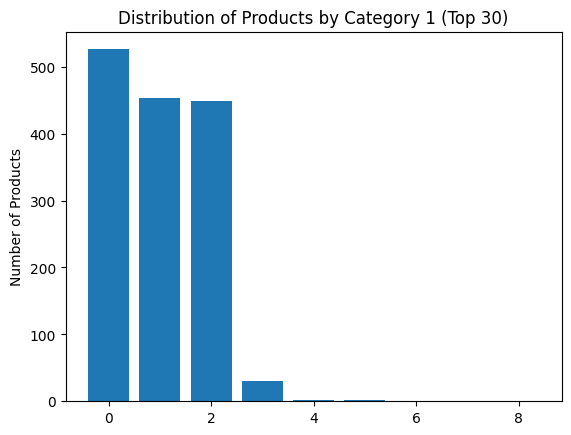

In [194]:
plt.bar(range(len(top_categories1['Category1'])), top_categories1['Number of Products'])
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Category 1 (Top 30)')
plt.show()

In [195]:
by_category2 = amazon_clean['category2'].value_counts()[:30]

In [196]:
top_categories2 = pd.DataFrame({'Category2': by_category2.index, 'Number of Products': by_category2.values})	
top_categories2.head(10)

,Category2,Number of Products
0,Accessories & Peripherals,381
1,Kitchen & Home Appliances,308
2,"Home Theater, TV & Video",162
3,Mobiles & Accessories,161
4,"Heating, Cooling & Air Quality",116
5,Wearable Technology,76
6,"Headphones, Earbuds & Accessories",66
7,Networking Devices,34
8,Office Paper Products,27
9,External Devices & Data Storage,18


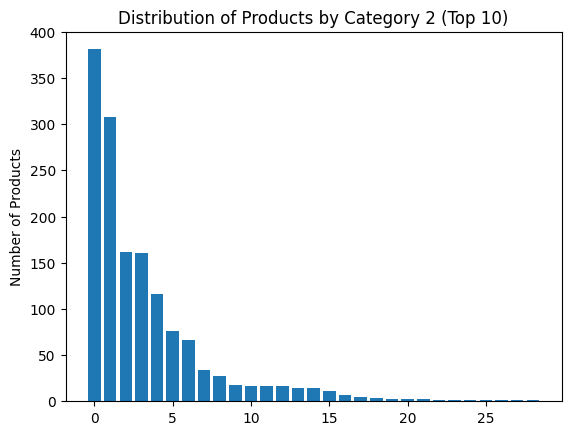

In [197]:
plt.bar(range(len(top_categories2['Category2'])), top_categories2['Number of Products'])
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Category 2 (Top 10)')
plt.show()

In [198]:
# Top six subcategories are Accessories & Peripherals, Kitchen & Home Appliances, Home Theater, TV & Video, Mobiles & Accessories	 . 

In [199]:
# They are mostly in demand and popular, therefore businesses should improve these categories to attract more customers. 
# By focusing on these categories, businesses could increase their sales and improve their competitiveness in the market.

#### Price Analysis

In [200]:
discount_by_category = amazon_clean.groupby('category1')['discount_percentage'].mean()

In [201]:
discount_by_category = discount_by_category.sort_values(ascending=False)

In [202]:
discount_by_category

category1
Home Improvement           0.575000
Computers & Accessories    0.540243
Health & PersonalCare      0.530000
Electronics                0.508289
Musical Instruments        0.460000
Car & Motorbike            0.420000
Home & Kitchen             0.401205
Office Products            0.123548
Toys & Games               0.000000
Name: discount_percentage, dtype: float64

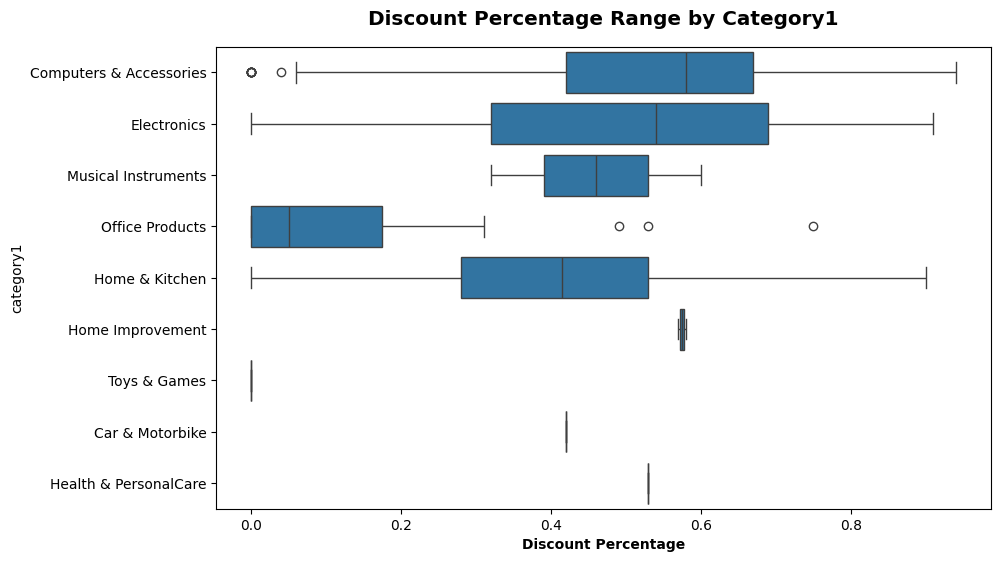

In [203]:
# The Discount Range by Product  Category 1
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=amazon_clean, x='discount_percentage', y='category1')
ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_title('Discount Percentage Range by Category1', fontweight='heavy', size='x-large', y=1.03)
plt.show()

In [204]:
# Categories with a large spread of discount variation are HomeImprovement, Computers&Accessories, and Health & PersonalCare, with values of 0.575, 0.540, and 0.530, respectively.
# It means that buisnesses in these categories are higly competetive since they offering higher discounts to attract customers, also moderate level of demand. 

In [205]:
# We need to mention that category with the lowest discount percentage is Toys&Games, with a value of 0.0. 
# So this means that the demand for toys and games is high enough that businesses do not need to offer significant discounts to sell products.

In [206]:
# What's the differences between actual and discounted prices
amazon_clean['difference_price'] = amazon_clean['actual_price'] - amazon_clean['discounted_price']

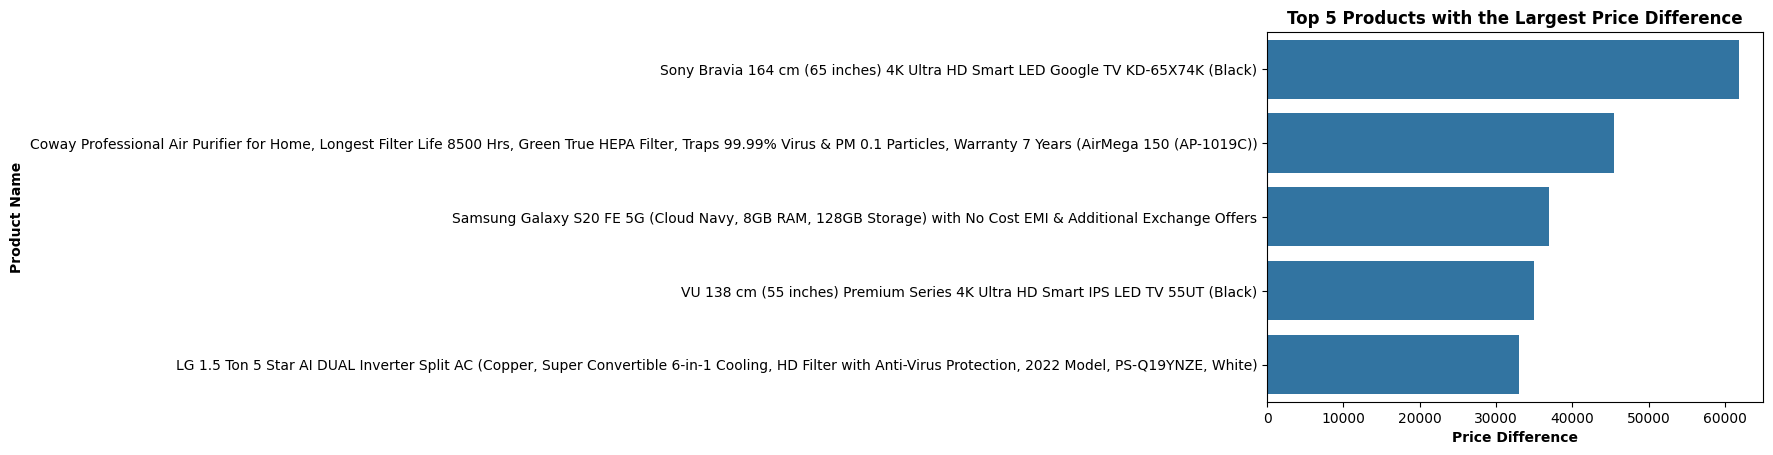

In [207]:
dif = sns.barplot(data= amazon_clean.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')
dif.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif.set_xlabel('Price Difference', fontweight='bold')
dif.set_ylabel('Product Name', fontweight='bold')
plt.show()

In [208]:
# Top 5 Most Expensive Products After Discount

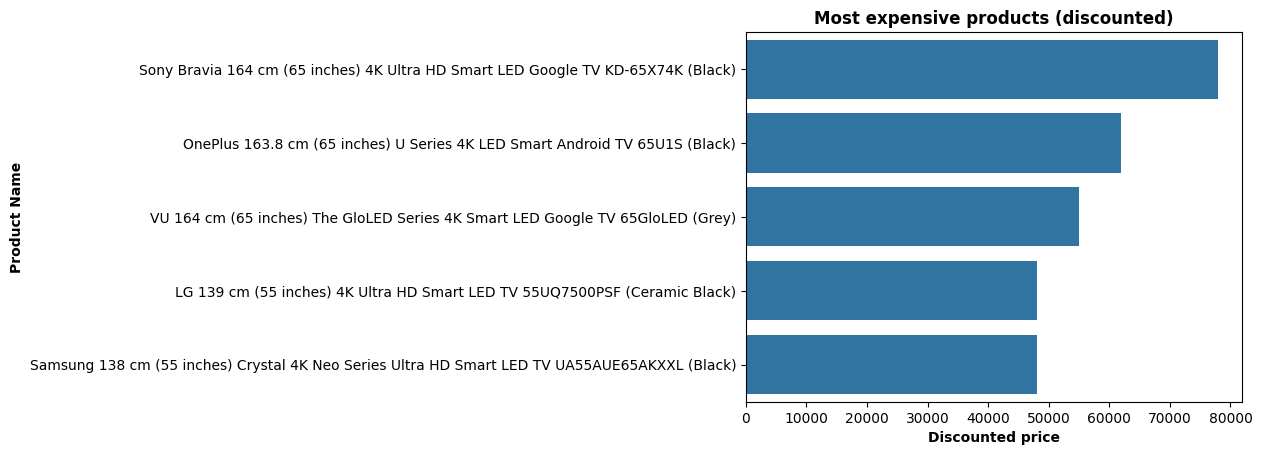

In [209]:
expensive = sns.barplot(data=amazon_clean.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')
expensive.set_title('Most expensive products (discounted)', fontweight='bold')
expensive.set_xlabel('Discounted price', fontweight='bold')
expensive.set_ylabel('Product Name', fontweight='bold')
plt.show()

In [210]:
# Top 5 cheapest Products After Discount

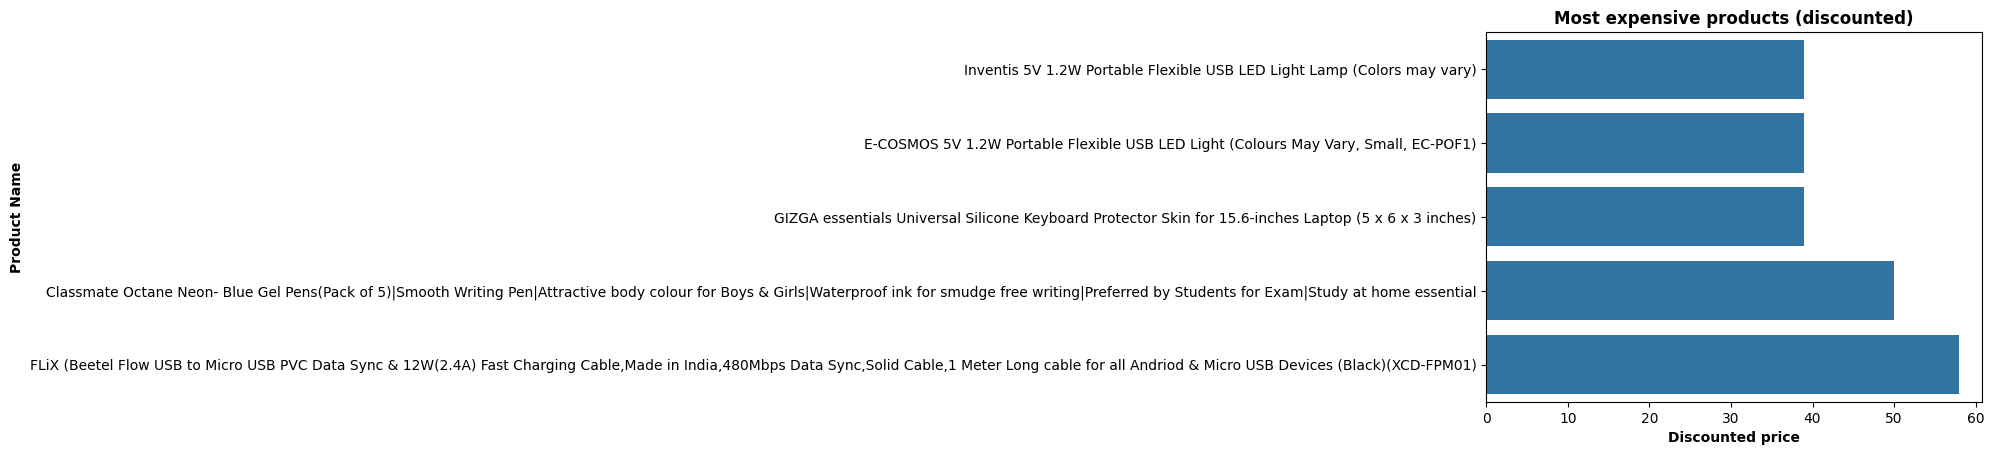

In [211]:
expensive = sns.barplot(data=amazon_clean.sort_values('discounted_price', ascending=True).head(5), x='discounted_price', y='product_name')
expensive.set_title('Most expensive products (discounted)', fontweight='bold')
expensive.set_xlabel('Discounted price', fontweight='bold')
expensive.set_ylabel('Product Name', fontweight='bold')
plt.show()

In [212]:
# Products with the highest discount percentages
top_discounts = amazon_clean.sort_values(by='discount_percentage', ascending=False).head(10)
top_discounts[['product_name', 'discount_percentage', 'discounted_price', 'actual_price']]

,product_name,discount_percentage,discounted_price,actual_price
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",0.94,294.0,4999.0
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",0.91,1799.0,19999.0
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",0.91,1799.0,19999.0
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",0.91,1799.0,19999.0
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",0.91,1799.0,19999.0
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",0.91,1799.0,19999.0
1026,beatXP Kitchen Scale Multipurpose Portable Ele...,0.90,199.0,1999.0
557,LAPSTER 12pcs Spiral Cable Protectors for Char...,0.90,99.0,999.0
542,Sounce Protective Case Cover Compatible Boat X...,0.90,199.0,1899.0
644,Sounce Spiral Charger Cable Protector Data Cab...,0.90,99.0,999.0


# MySQL integration

In [213]:
amazon_clean.to_csv('amazon.csv', index=False)

In [214]:
import mysql.connector
from sqlalchemy import create_engine

In [215]:
db_config = {
    'user': 'root',
    'password': '6491',
    'host': 'localhost',
    'database': 'amazon',
    'port': '3306'
}

In [216]:
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

In [110]:
amazon_clean.to_sql(name="amazon_data", con = engine, if_exists='replace', index=False)

NotSupportedError: (mysql.connector.errors.NotSupportedError) Authentication plugin 'caching_sha2_password' is not supported
(Background on this error at: https://sqlalche.me/e/20/tw8g)